<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Часть-1.-Загрузка-данных-и-план-работ" data-toc-modified-id="Часть-1.-Загрузка-данных-и-план-работ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Часть 1. Загрузка данных и план работ</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы:</a></span></li><li><span><a href="#План-работ:" data-toc-modified-id="План-работ:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>План работ:</a></span></li></ul></li><li><span><a href="#Часть-2.-Предобработка-данных-и-поиск-модели" data-toc-modified-id="Часть-2.-Предобработка-данных-и-поиск-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Часть 2. Предобработка данных и поиск модели</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Новые признаки</a></span></li><li><span><a href="#Распределение-данных" data-toc-modified-id="Распределение-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Распределение данных</a></span></li><li><span><a href="#Анализ-на-мультиколлинеарность" data-toc-modified-id="Анализ-на-мультиколлинеарность-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ на мультиколлинеарность</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.7.4"><span class="toc-item-num">2.7.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

## Часть 1. Загрузка данных и план работ

In [65]:
!pip install phik
!pip install catboost
!pip install shap

In [66]:
# Загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import os
import seaborn as sns

import datetime
import matplotlib.pyplot as plt
import warnings
import time
import phik
import shap

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import (
    get_scorer_names,
    roc_auc_score,
    confusion_matrix
)

import lightgbm as lgbm
import catboost as cb
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

# настройки
warnings.filterwarnings("ignore")

%matplotlib inline

In [67]:
# Загрузим данные
pth_local_user = '/Users/maxim/Documents/Data science/datasets/final/'

pth_local_yandex = '/datasets/'

pth_web = 'https://code.s3.yandex.net/datasets/'

if os.path.exists(pth_local_user):
    data_contract = pd.read_csv(pth_local_user+'contract_new.csv', sep=',')
    data_internet = pd.read_csv(pth_local_user+'internet_new.csv', sep=',')
    data_phone = pd.read_csv(pth_local_user+'phone_new.csv', sep=',')
    data_personal = pd.read_csv(pth_local_user+'personal_new.csv', sep=',')

elif os.path.exists(pth_local_yandex):
    data_contract = pd.read_csv(pth_local_yandex+'contract_new.csv', sep=',')
    data_internet = pd.read_csv(pth_local_yandex+'internet_new.csv', sep=',')
    data_phone = pd.read_csv(pth_local_yandex+'phone_new.csv', sep=',')
    data_personal = pd.read_csv(pth_local_yandex+'personal_new.csv', sep=',')
else:
    data_contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv', sep=',')
    data_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv', sep=',')
    data_phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv', sep=',')
    data_personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv', sep=',')

Посмотрим на данные

In [68]:
data_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [69]:
data_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [70]:
data_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [71]:
data_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [72]:
print (f'Размер датасета data_contract: {data_contract.shape}')
print (f'Размер датасета data_internet: {data_internet.shape}')
print (f'Размер датасета data_phone: {data_phone.shape}')
print (f'Размер датасета data_personal: {data_personal.shape}')

Размер датасета data_contract: (7043, 8)
Размер датасета data_internet: (5517, 8)
Размер датасета data_phone: (6361, 2)
Размер датасета data_personal: (7043, 5)


Данные в файле data_contract можно считать основными, т.к. в нем есть информация о таргете.

Сделаем объединенние data_contract с другими датасетами по полю customerID

In [73]:
data = pd.merge(data_contract, data_internet, how='left', on='customerID')
data = pd.merge(data, data_phone, how='left', on='customerID')
data = pd.merge(data, data_personal, how='left', on='customerID')
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,NaN,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,DSL,Yes,No,Yes,Yes,No,No,NaN,Male,0,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Fiber optic,No,No,No,No,No,No,No,Female,0,No,No


Посмотрим на получившийся датасет

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  MultipleLines     6361 non-null   object 
 16  gender            7043 non-null   object 


Посмотрим на количество уникальных значений в каждом из столбцов

In [75]:
for col in data.columns:
    print(col, len(data[col].value_counts()))

customerID 7043
BeginDate 77
EndDate 67
Type 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6658
InternetService 2
OnlineSecurity 2
OnlineBackup 2
DeviceProtection 2
TechSupport 2
StreamingTV 2
StreamingMovies 2
MultipleLines 2
gender 2
SeniorCitizen 2
Partner 2
Dependents 2


In [76]:
data.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
dtype: int64

Text(0.5, 0.98, 'Распределение MonthlyCharges')

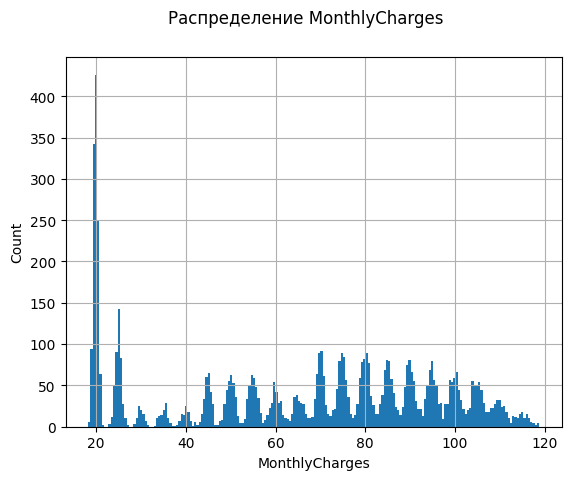

In [77]:
# Посмотрим на распределение единственного числового признака в выборке
data['MonthlyCharges'].hist(bins=200);
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.suptitle("Распределение MonthlyCharges")

### Выводы:

1. Таблицы удалось объединить по полю customerID без потерь и получился единый датасет размером 7043*19
2. В признаках присутствует неверный формат данных, дата BeginDate и EndDate указана как Object, также TotalCharges имеет формат Object
3. Присутствуют пропуски в столбцах
4. Много столбцов с бинарными значениями Yes\No
5. Целевой признак отсутствует в явном виде
6. Дубликатов нет. Количество уникальных customerID соответствует размеру датасета
6. Аномалий в данных предварительно не обнаружено

Вопросов по данным и постановке задач пока не возникло

### План работ:

1. Провести EDA, включая:
    - Приведение к верным типам данных
    - Заполнение пропусков
    - Создание новых признаков
    - Формирование целевого признака
    - Устранение мультиколлиниарности с помощью phik
    - Удаление ненужных признаков
    
2. Разделение на выборки train\test в пропорции 75%\25% без учета дисбаланса класса
3. Формирования пайплайна, в котором будет проводиться кодирование и масштабирование признаков с учетом типа используемой модели. Планирую протестировать 3 модели:
    - LogisticRegression
    - LGBMClassifier
    - CatBoostClassifier

Поиск лучшей модели с помощью GridSearchCV, с оптимизацией по метрике ROC-AUC, дополнительно считая метрики Recall и Precision
4. Выбор лучшей модели на кросс-валидации на train
5. Тестирование лучшей модели на test. Целевой порог ROC-AUC > 0.85
6. Исследование важности признаков лучшей модели и построение матрицы ошибок
7. Формирование отчета по результатам работы

    

## Часть 2. Предобработка данных и поиск модели

### Заполнение пропусков

Пропуски только в пакетах услуг со значениями Yes\No и в поле InternetService с типом соединения. Можно предположить, что пропуск означает, что клиент не пользуется услугой, поэтому заменим все пропуски значением 'NotUsed'

In [78]:
# Пропуски заменяем заглушкой unknown
data = data.fillna('NotUsed')

### Изменение типа данных

In [79]:
# Изменим типы данных на более подходящие
data['BeginDate'] = pd.to_datetime(data['BeginDate'], errors='coerce')
data['EndDate'] = pd.to_datetime(data['EndDate'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [80]:
# Посмотрим на пропуски после замены типов данных
data.isna().sum()

customerID             0
BeginDate              0
EndDate             5942
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
dtype: int64

In [81]:
# Посмотрим на пропуски в столбце TotalCharges
data[data['TotalCharges'].isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,gender,SeniorCitizen,Partner,Dependents
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,DSL,Yes,No,Yes,Yes,Yes,No,NotUsed,Female,0,Yes,Yes
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,No,Male,0,No,Yes
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,DSL,Yes,Yes,Yes,No,Yes,Yes,No,Female,0,Yes,Yes
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,Yes,Male,0,Yes,Yes
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,NotUsed,Female,0,Yes,Yes
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,No,Male,0,Yes,Yes
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,Yes,Male,0,Yes,Yes
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,No,Female,0,Yes,Yes
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,NotUsed,No,Male,0,Yes,Yes
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,DSL,No,Yes,Yes,Yes,Yes,No,Yes,Female,0,Yes,Yes


Видим что пропуски в поле TotalCharges только у клиентов, которые зарегистрировались 2020-02-01, т.е. в день выгрузки, и по ним еще не успела сформироваться общая статистика. Поэтому заполним эти пропуски данными за 2020-02 с поля MonthlyCharges

In [82]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'])

### Новые признаки

In [83]:
# Проверим есть ли клиенты, которые ушли в день выгрузки данных 2020-02-01
data[data['EndDate'] == '2020-02-01'].shape[0]

0

In [84]:
# Заменим пропуск в столбце EndDate на дату выгрузки 2020-02-01
data['EndDate'] = data['EndDate'].fillna(datetime.date(2020,2,1))
data['EndDate'] = pd.to_datetime(data['EndDate'])

In [85]:
# Посчитаем как долго пользователи были или являются на момент 01.02.2020 клиентами Компании
data['ContractPeriod'] = data['EndDate'] - data['BeginDate']

In [86]:
# Сохраним только значение в днях
data['ContractPeriod'] = data['ContractPeriod'].apply(lambda x: x.days)

Введем целевой признак Exited, который принимает значение 1, если клиент ушел и у него есть дата ухода EndDate не равна 2020-02-01

In [87]:
data.loc[:, 'Exited'] = 1
data.loc[data['EndDate']=='2020-02-01', 'Exited'] = 0

### Распределение данных

In [88]:
# Удалим ненужные столбцы
data = data.drop(columns=['customerID', 'BeginDate', 'EndDate'])

In [89]:
# Сформируем списки числовых и категориальных признаков
cat_features = data.select_dtypes('object').columns.tolist()

num_features = data.select_dtypes(['int64','float64']).columns.tolist()

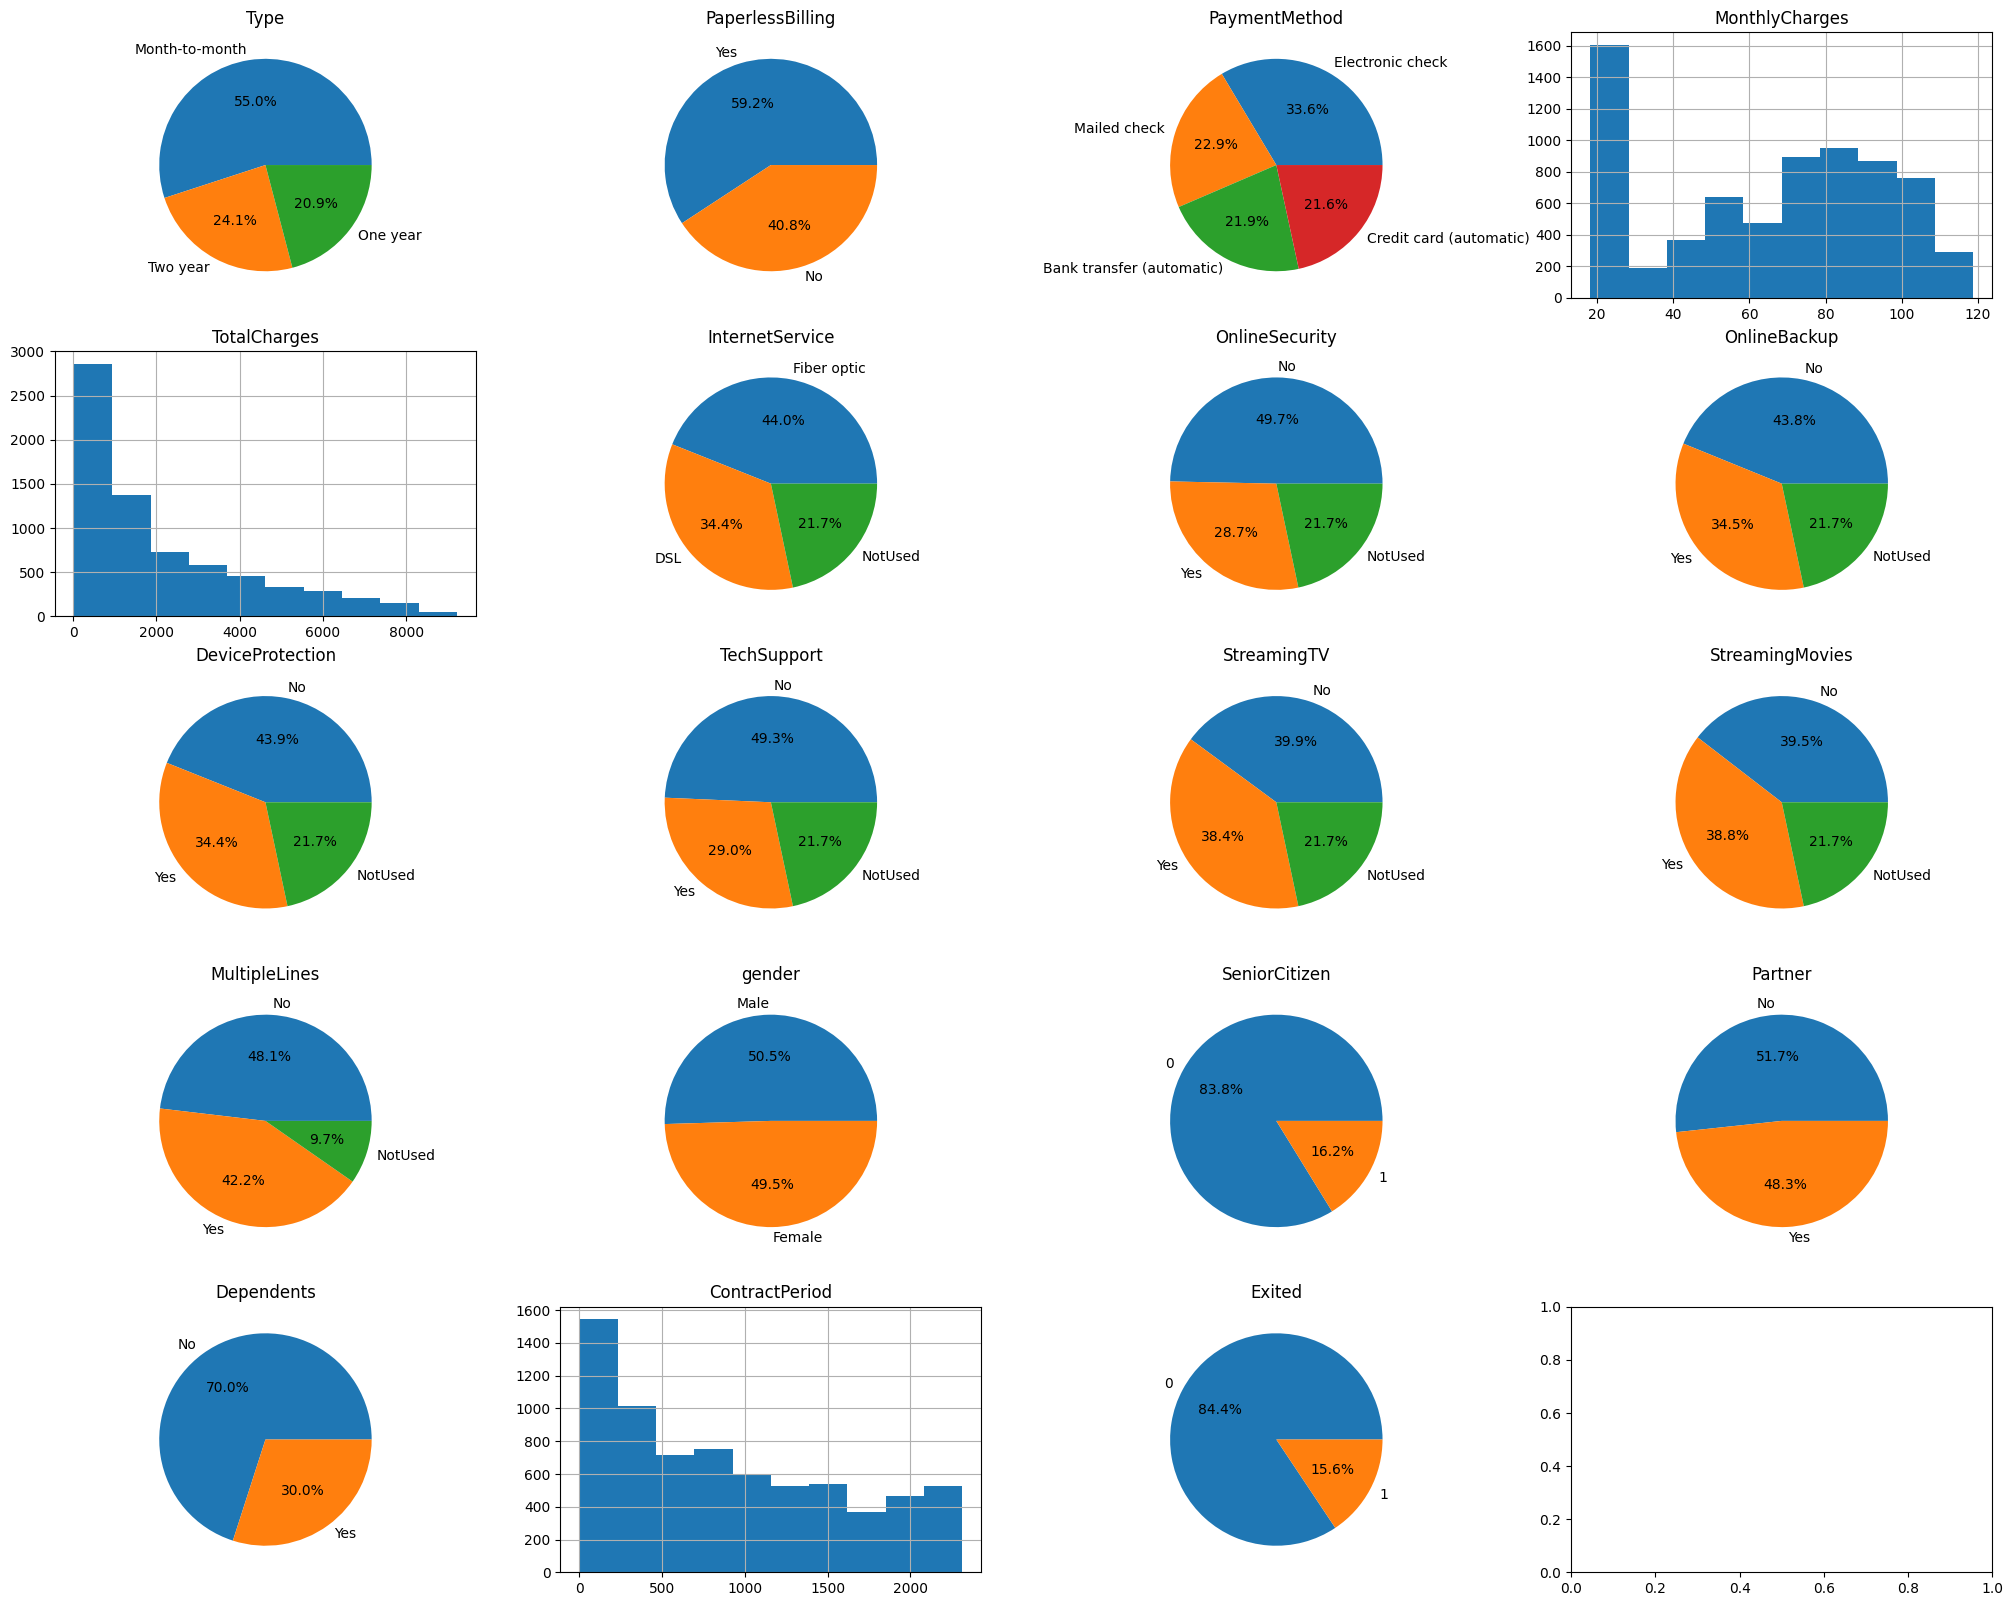

In [90]:
# Посмотрим на распределение данных
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_features or col == 'Exited':
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].hist(ax=ax)

Целевой признак имеет сильно несбалансированный класс.
Аномалий в признаках не наблюдается. Можно использовать стандартный OHE и обычное масштабирование

### Анализ на мультиколлинеарность

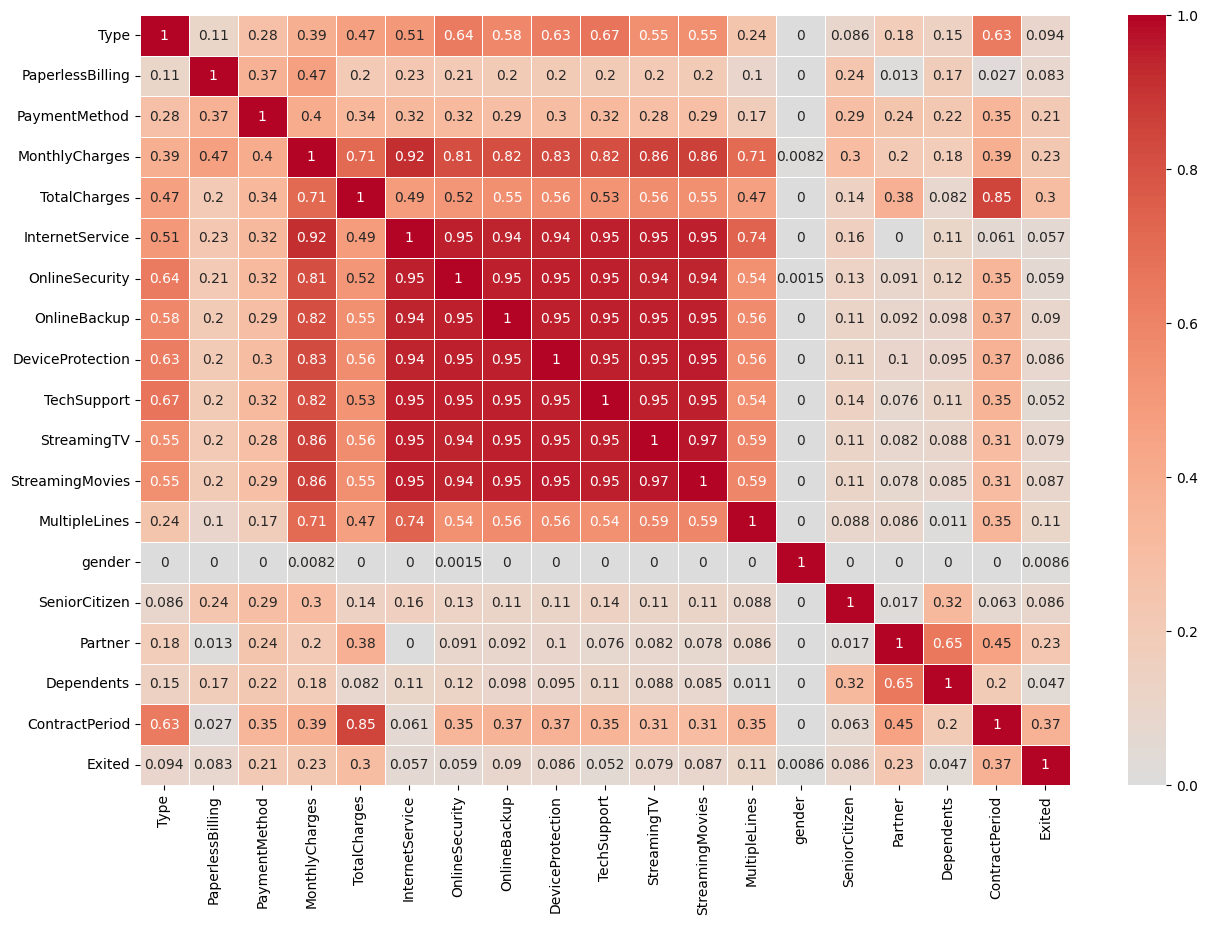

In [91]:
# Посмотрим на корреляцию данных
plt.figure(figsize=(15,10))
sns.heatmap(data.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'ContractPeriod', 'Exited']),
            annot=True,
            cmap="coolwarm",
            center=0,
            linewidth=.5,
            fmt='.2g'
           );

Наблюдается высокая корреляция между пользованием интернетом InternetService и подключенным интернет услугами, поэтому можно удалить все интернет услуги и оставить только InternetService.

Корреляция между InternetService и MonthlyCharges высокая, но это разного типа признаки, категориального и числового, поэтому оставляем оба.

Также высокая корреляция между TotalCharges и ContractPeriod, но это 2 разных по сути признака и оставим оба.

In [92]:
data = data.drop(columns=['OnlineSecurity',
                          'OnlineBackup',
                          'DeviceProtection',
                          'TechSupport',
                          'StreamingTV',
                          'StreamingMovies'])

### Разделение на выборки

In [93]:
RANDOM_STATE=110923

In [94]:
target = data['Exited']
features = data.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

# Сформируем заново списки числовых и категориальных признаков после удаления столбцов
cat_features = features_train.select_dtypes('object').columns.tolist()

num_features = features_train.select_dtypes(['int64', 'float64']).columns.tolist()

print (f'Размер обучающей выборки: {features_train.shape}')
print (f'Размер тестовой выборки: {features_test.shape}')

# Для работы с CatBoost устраняем ошибку
# "AttributeError: 'DataFrame' object has no attribute 'iteritems'"

features_train.iteritems = features_train.items
target_train.iteritems = target_train.items
features_test.iteritems = features_test.items
target_test.iteritems = target_test.items

Размер обучающей выборки: (5282, 12)
Размер тестовой выборки: (1761, 12)


### Обучение моделей

In [139]:
# Создадим таблицу со сводными метриками по каждой модели
all_scores = pd.DataFrame(columns=['Precition', 'Recall', 'ROC_AUC'])
all_scores

,Precition,Recall,ROC_AUC


In [131]:
# Создадим функцию, которая вычесляет метрики
# на кросс-валидации и записывает их средние значения в таблицу

def cv_prec_rec(model, features, target, table, model_name):
  scoring = ['precision', 'recall', 'roc_auc']
  scores = cross_validate(model, features, target, scoring=scoring, cv=5)
  table.loc[model_name, 'Precition'] = pd.DataFrame(scores)['test_precision'].mean()
  table.loc[model_name, 'Recall'] = pd.DataFrame(scores)['test_recall'].mean()
  table.loc[model_name, 'ROC_AUC'] = pd.DataFrame(scores)['test_roc_auc'].mean()

  print(f'Оценка качества для {model_name}:')
  print(table.loc[model_name])



#### LogisticRegression

In [126]:
col_transformer= make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
    (StandardScaler(), num_features)
)

model_lr = LogisticRegression(random_state=RANDOM_STATE)

pipeline_lr = make_pipeline(col_transformer, model_lr)

param_grid_lr = {
    'logisticregression__C': [0.01, 0,1, 1.0, 10.0, 50, 100, 200]
    }

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    refit='AUC',
    n_jobs=-1,
    cv=5
)

grid_lr.fit(features_train, target_train)

lr_best_score = grid_lr.best_score_
lr_best_params = grid_lr.best_params_
lr_best_model = grid_lr.best_estimator_

In [127]:
# лучшее значение ROC_AUC на кросс-валидации
print(f'best_score ROC_AUC LogisticRegression: {lr_best_score}')
print ("_____________")

# лучшие гиперпараметры
print(f'best_params:\n {lr_best_params}')

best_score ROC_AUC LogisticRegression: 0.7588464756307852
_____________
best_params:
 {'logisticregression__C': 200}


In [140]:
# Посмотрим на метрику и запишем оценку качества модели в общую таблицу
cv_prec_rec(lr_best_model, features_train, target_train, all_scores, 'LogisticRegression')

Оценка качества для LogisticRegression:
Precition    0.749873
Recall       0.193431
ROC_AUC      0.758846
Name: LogisticRegression, dtype: object


#### LGBMClassifier

In [117]:
%%time
col_transformer= make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
    (StandardScaler(), num_features)
)

model_lgbm = lgbm.LGBMClassifier(random_state=RANDOM_STATE, )

pipeline_lgbm = make_pipeline(col_transformer, model_lgbm)

param_grid_lgbm = {
    'lgbmclassifier__max_depth': [5, 10],
    'lgbmclassifier__n_estimators': [100, 500, 1000],
    'lgbmclassifier__learning_rate': [0.05, 0.1, 1],
    'lgbmclassifier__min_data_in_leaf': [3, 5, 10],
    'lgbmclassifier__verbose': [-1]
    }

grid_lgbm = GridSearchCV(
    pipeline_lgbm,
    param_grid=param_grid_lgbm,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5
)

grid_lgbm.fit(features_train, target_train)

lgbm_best_score = grid_lgbm.best_score_
lgbm_best_params = grid_lgbm.best_params_
lgbm_best_model = grid_lgbm.best_estimator_

CPU times: user 4.37 s, sys: 429 ms, total: 4.8 s
Wall time: 2min 6s


In [129]:
# лучшее значение ROC_AUC на кросс-валидации
print(f'best_score ROC_AUC LGBMClassifier: {lgbm_best_score}')
print ("_____________")

# лучшие гиперпараметры
print(f'best_params:\n {lgbm_best_params}')

best_score ROC_AUC LGBMClassifier: 0.8876678956265994
_____________
best_params:
 {'lgbmclassifier__learning_rate': 0.05, 'lgbmclassifier__max_depth': 5, 'lgbmclassifier__min_data_in_leaf': 5, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__verbose': -1}


In [141]:
# Посмотрим на метрику и запишем оценку качества модели в общую таблицу
cv_prec_rec(lgbm_best_model, features_train, target_train, all_scores, 'LGBMClassifier')

Оценка качества для LGBMClassifier:
Precition    0.826818
Recall       0.523867
ROC_AUC      0.887668
Name: LGBMClassifier, dtype: object


#### CatBoostClassifier

In [103]:
# Зададим параметры модели
params = {
    'loss_function' : 'Logloss',
    'verbose' : False,
    'random_seed' : RANDOM_STATE,
    'eval_metric' : 'AUC:hints=skip_train~false',
    'cat_features' : cat_features,
    'iterations' : 500

}

# Зададим сетку гиперпараметров для поиска лучших
param_grid_cb = {'learning_rate': [0.01, 0.1, 0.3],
                 'depth': [5, 7, 10],
                 'l2_leaf_reg': [1, 3, 5]
                 }

In [ ]:
# Инициализация модели
model_cb = CatBoostClassifier(**params)

# Поиск лучших гиперпараметров
grid_cb = model_cb.grid_search(param_grid_cb,
                               X=features_train,
                               y=target_train,
                               cv = 5,
                               refit=True)

cb_best_score = model_cb.best_score_['learn']['AUC']
cb_best_params = model_cb.get_params()
cb_best_model = model_cb


bestTest = 0.8468149071
bestIteration = 499

0:	loss: 0.8468149	best: 0.8468149 (0)	total: 4.2s	remaining: 1m 49s

bestTest = 0.9231546949
bestIteration = 484

1:	loss: 0.9231547	best: 0.9231547 (1)	total: 9.71s	remaining: 2m 1s

bestTest = 0.9254780652
bestIteration = 346

2:	loss: 0.9254781	best: 0.9254781 (2)	total: 14.6s	remaining: 1m 57s

bestTest = 0.8460716964
bestIteration = 496

3:	loss: 0.8460717	best: 0.9254781 (2)	total: 18.7s	remaining: 1m 47s

bestTest = 0.9150463335
bestIteration = 494

4:	loss: 0.9150463	best: 0.9254781 (2)	total: 25.3s	remaining: 1m 51s

bestTest = 0.9295489849
bestIteration = 418

5:	loss: 0.9295490	best: 0.9295490 (5)	total: 31.5s	remaining: 1m 50s

bestTest = 0.8449234024
bestIteration = 495

6:	loss: 0.8449234	best: 0.9295490 (5)	total: 35.8s	remaining: 1m 42s

bestTest = 0.9146847715
bestIteration = 496

7:	loss: 0.9146848	best: 0.9295490 (5)	total: 43s	remaining: 1m 42s

bestTest = 0.9238845144
bestIteration = 337

8:	loss: 0.9238845	best: 0.929

In [121]:
# Посмотрим на метрику лучшей модели
print('ROC_AUC best model CatBoost: {0:.3f}'.format(model_cb.best_score_['learn']['AUC']))

print ('Параметры лучшей модели CatBoost:')
model_cb.get_params()

ROC_AUC best model CatBoost: 0.999
Параметры лучшей модели CatBoost:


{'iterations': 500,
 'loss_function': 'Logloss',
 'random_seed': 110923,
 'verbose': False,
 'eval_metric': 'AUC:hints=skip_train~false',
 'cat_features': ['Type',
  'PaperlessBilling',
  'PaymentMethod',
  'InternetService',
  'MultipleLines',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents'],
 'depth': 5,
 'l2_leaf_reg': 3,
 'learning_rate': 0.3}

In [142]:
# Посмотрим на метрику и запишем оценку качества модели в общую таблицу
cv_prec_rec(cb_best_model, features_train, target_train, all_scores, 'CatBoostClassifier')

Оценка качества для CatBoostClassifier:
Precition    0.837801
Recall       0.545855
ROC_AUC      0.906395
Name: CatBoostClassifier, dtype: object


In [143]:
# Посмотрим на сводную таблицу по метрикам

all_scores

,Precition,Recall,ROC_AUC
LogisticRegression,0.749873,0.193431,0.758846
LGBMClassifier,0.826818,0.523867,0.887668
CatBoostClassifier,0.837801,0.545855,0.906395


#### Вывод

Протестировано 3 модели, подобраны лучшие гиперпараметры для каждой, по метрике roc_auc на кросс-валидации по обучающей выборке на 5 фолдах.

Лучшие модели:
- LogisticRegression
    - best_score ROC_AUC LogisticRegression: 0.759
    - best_params: 'logisticregression__C': 200
- LGBMClassifier
    - best_score ROC_AUC LGBMClassifier: 0.888
    - best_params: 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'min_data_in_leaf': 5

- CatBoostClassifier
    - ROC_AUC best model CatBoost: 0.906
    - best_params: 'iterations': 500, 'depth': 5, 'l2_leaf_reg': 3, 'learning_rate': 0.3


На обучающих данных заметно лучше показала себя модель CatBoostClassifier, поэтому именно ее протестируем на тестовых данных

### Тестирование

На тестовых данных проверим модель CatBoostClassifier

In [144]:
# Предскажим по тестовым данным и посмотрим на метрику roc_auc
predict_test = model_cb.predict_proba(features_test)
rocauc_test = roc_auc_score(target_test, predict_test[:,1])
print('ROC_AUC best model CatBoost test: {0:.3f}'.format(rocauc_test))


ROC_AUC best model CatBoost test: 0.929


In [146]:
# Функция по визуализации матрицы ошибок
def plot_cf_matrix(model, features, target, est_name):
    # Предскажем целевой признак
    predict = model.predict(features)

    # Рассчитаем матрицу ошибок
    cf_matrix = confusion_matrix(target, predict)

    # Отобразим ее в виде тепловой диаграммы
    plt.figure(figsize=(3,2))
    ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='d', center=0, linewidth=.5)

    ax.set_title(f"Матрица ошибок {est_name} \nна тестовых данных\n");
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.show()

Протестируем лучшую модель CatBoost на выборке test

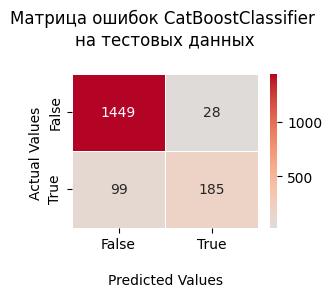

In [147]:
plot_cf_matrix(model_cb, features_test, target_test, 'CatBoostClassifier')

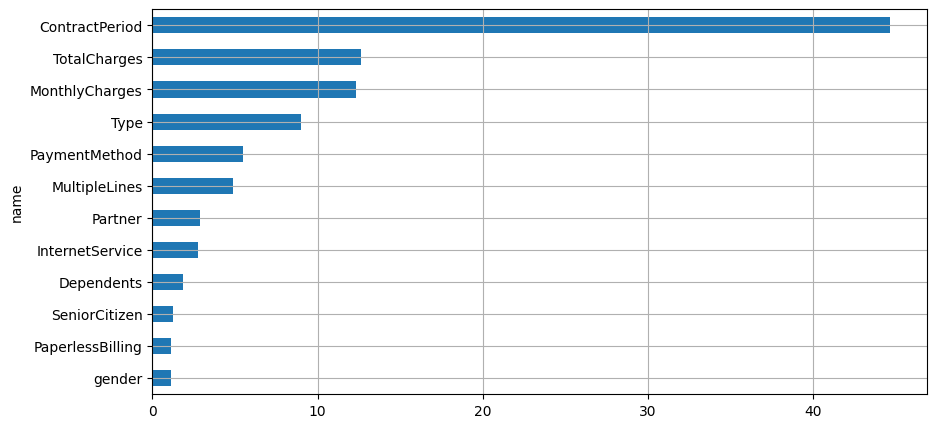

In [148]:
# Исследуем важность признаков лучшей модели
fi = pd.DataFrame({'name':model_cb.feature_names_,'w':model_cb.feature_importances_})
fi.sort_values('w',inplace=True)
ax_fi = fi.set_index('name')['w'].plot(kind='barh',figsize=(10,5), grid = True);

In [149]:

explainer = shap.Explainer(model_cb)
shap_values = explainer(features_test)

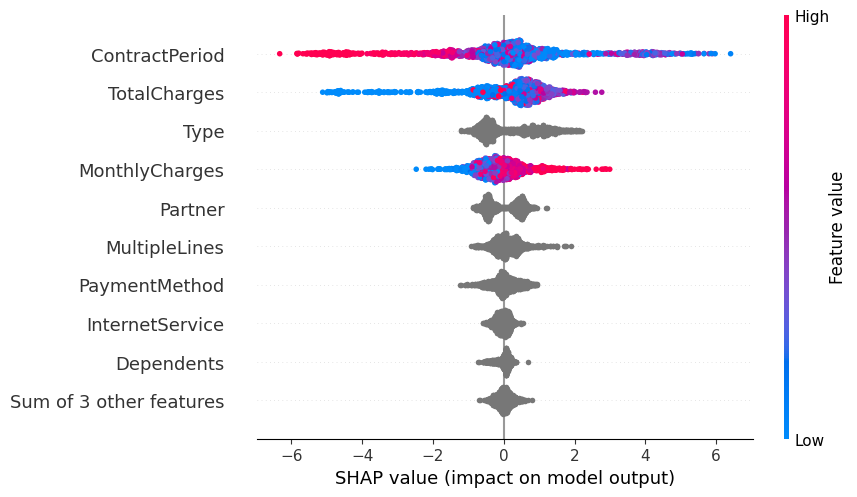

In [150]:
shap.plots.beeswarm(shap_values)

In [151]:
# Список признаков по важности
fi['name'].values

array(['gender', 'PaperlessBilling', 'SeniorCitizen', 'Dependents',
       'InternetService', 'Partner', 'MultipleLines', 'PaymentMethod',
       'Type', 'MonthlyCharges', 'TotalCharges', 'ContractPeriod'],
      dtype=object)

### Вывод

Протестированы 3 модели, обученные на выборке train. Лучшую метрику roc_auc показала модель CatBoostClassifier.

- на обучающих данных roc_auc = 0.906
- на тестовых данных roc_auc = 0.929

На тестовой выборке в 1761 объектов и 284 объектов положительного класса модель имеет низкую ошибку 1го рода, ошиблась в положительном предсказании всего в 28 случаях.
Но имеет значительно большую ошибку 2го рода и не смогла предсказать верно 99 случая

Для обучения использованы признаки (в порядке возрастания важности признака):
['gender', 'Dependents', 'PaperlessBilling', 'SeniorCitizen', 'InternetService', 'Partner', 'MultipleLines', 'PaymentMethod', 'Type', 'MonthlyCharges', 'TotalCharges', 'ContractPeriod']

Самый значительный вклад в предсказание вносит признак ContractPeriod. Также существенно влияют на предсказание признаки TotalCharges, MonthlyCharges и Type.
Меньше всего оказывает влияние признаки PaperlessBilling, Dependents и gender.




<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Итоговый комментарий тимлида V2 ⚠️</b>
       
Хорошая реализация второй части, по структуре вижу, что есть понимание процессов) Осталось поправить отмеченные моменты, буду ждать!)
    
</div>


## Часть 3. Отчет

Изначальный план работ был выполнен в полном объеме.

На входе было 4 файла с информацией о клинтах и используемых услугах. Все четыре файла были объеденены по ключевому полю customerID без потерь и получился единый датасет размером 7043*19

В датасете были исправлены типы данных, пропуски в столбце TotalCharges были заменены на значения из столбца MonthlyCharges. Остальные пропуски заменены заглушкой 'NotUsed'.

На основании дат BeginDate и EndDate введен новый признак - ContractPeriod (ед.изм. - день) и введен целевой признак Exited (1 - клиент ушел, 0 - клиент остался)

Признаки customerID, BeginDate и EndDate удалены для дальнейшей работы.

Анализ на мультиколлиниарность показал сильную корреляцию между признаком InternetService и подключенными интернет услугами, поэтому признаки описывающие разные интернет услуги также были удалены.

Вся выборка была поделена на train\test в пропорции 75\25.

Протестированы 3 модели:
    - LogisticRegression
    - LGBMClassifier
    - CatBoostClassifier

Поиск лучшей модели была проведен с помощью GridSearchCV, с cv=5, с оптимизацией по метрике ROC-AUC, дополнительно считая метрики Recall и Precision. Использовался пайплайн для корректной кодировки и масштабирования признаков перед обучением на фолдах.

По результатам оптимизации гиперпараметров модели показали следующие оценки:

- LogisticRegression
  - ROC_AUC: 0.759
  - best_params: 'C': 200
- LGBMClassifier
  - ROC_AUC : 0.888
  - best_params: 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'min_data_in_leaf': 5
- CatBoostClassifier
  - ROC_AUC: 0.906
  - best_params: 'iterations': 500, 'depth': 5, 'l2_leaf_reg': 3, 'learning_rate': 0.3

На обучающих данных лучше показала себя модель CatBoostClassifier, поэтому на тесте была использована именно она.

На тестовых данных модель CatBoostClassifier показала оценку roc_auc = 0.929

На тестовой выборке в 1761 объектов и 284 объектов положительного класса модель показала низкую ошибку 1го рода, ошиблась в положительном предсказании всего в 28 случаях. Но имеет значительно большую ошибку 2го рода и не смогла предсказать верно 99 случая

Для обучения использованы признаки (в порядке возрастания важности признака): ['gender', 'Dependents', 'PaperlessBilling', 'SeniorCitizen', 'InternetService', 'Partner', 'MultipleLines', 'PaymentMethod', 'Type', 'MonthlyCharges', 'TotalCharges', 'ContractPeriod']

Самый значительный вклад в предсказание вносит признак ContractPeriod. Также существенно влияют на предсказание признаки TotalCharges, MonthlyCharges и Type. Меньше всего оказывает влияние признаки PaperlessBilling, Dependents и gender.
